In [1]:
# import libraries
import numpy as np
np.set_printoptions(precision = 4, suppress = True)
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import modules
from widgets import CandlestickWidget

import mplfinance as mpf

In [2]:
out_dir = "./data/out/brute force/56"
series_dir = os.path.join(out_dir, "best-series")
in_dir = "./data/in"
candles_path = os.path.join(in_dir, "ohlcv-eth-usdt-1-min.csv")

In [3]:
def get_series(csv_path, sep=',', time_col="time"):
    series = pd.read_csv(csv_path, sep)
    series.drop(index=0)
    series[time_col] = pd.to_datetime(series[time_col], unit='s')
    series.set_index(time_col, inplace=True)
    return series

In [4]:
column_names = ["time", "open", "high", "low", "close"]
candle_series = pd.read_csv(candles_path, '|', names=column_names, usecols=range(5), header=None)
candle_series.set_index("time", inplace=True)
candle_series.index = pd.to_datetime(candle_series.index,unit='s')

In [5]:
candle_series.head(10)

,open,high,low,close
time,,,,
2017-08-17 04:00:00,301.13,301.13,301.13,301.13
2017-08-17 04:01:00,301.13,301.13,301.13,301.13
2017-08-17 04:02:00,300.00,300.00,300.00,300.00
2017-08-17 04:03:00,300.00,300.00,300.00,300.00
2017-08-17 04:04:00,301.13,301.13,301.13,301.13
2017-08-17 04:05:00,300.00,301.13,300.00,301.13
2017-08-17 04:06:00,300.10,300.10,300.10,300.10
2017-08-17 04:07:00,300.10,300.10,300.10,300.10
2017-08-17 04:08:00,300.10,300.10,298.00,298.00


In [6]:
# get series
close_balance_series = get_series(os.path.join(series_dir, "close-balance-series.csv"))
equity_series = get_series(os.path.join(series_dir, "equity-series.csv"))
open_order_series = get_series(os.path.join(series_dir, "open-order-series.csv"))
close_order_series = get_series(os.path.join(series_dir, "close-order-series.csv"))
exit_indic_series = get_series(os.path.join(series_dir, "exit-indic-series.csv"))
entry_indic_series = get_series(os.path.join(series_dir, "entry-indic-series.csv"))

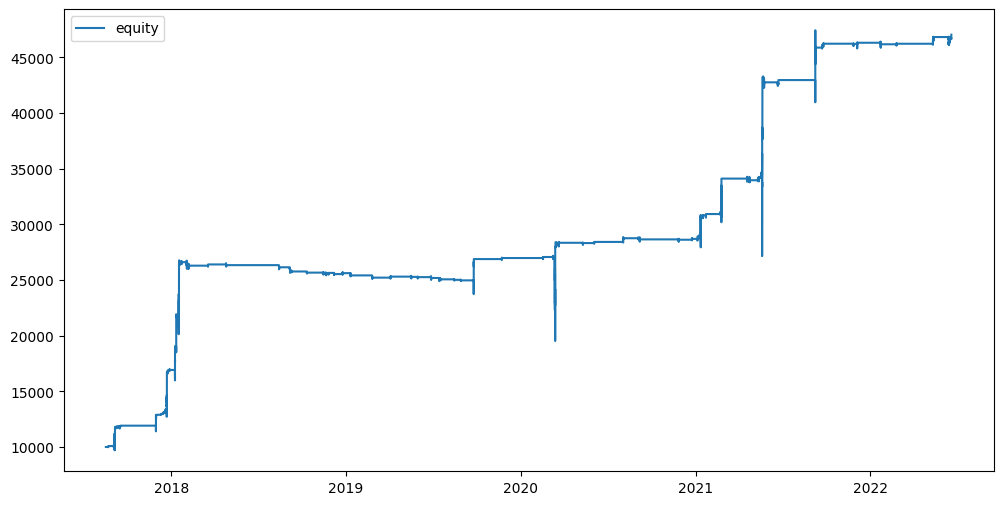

In [8]:
# plot last position
fig, ax = plt.subplots(figsize=(12, 6))
ax.step(equity_series.index, equity_series["equity"], where="post", label="equity")
ax.legend();

In [9]:
fig.savefig(os.path.join(out_dir, "equity.png"), bbox_inches='tight', dpi=200)

In [10]:
# reindex
entry_indic_series = entry_indic_series.reindex(candle_series.index)
open_order_series = open_order_series.reindex(candle_series.index)
close_order_series = close_order_series.reindex(candle_series.index)
exit_indic_series = exit_indic_series.reindex(candle_series.index)
entry_indic_series = entry_indic_series.reindex(candle_series.index)

In [11]:
%matplotlib qt
widget = CandlestickWidget(candle_series, entry_indic_series, exit_indic_series, open_order_series,
                           close_order_series, "historical simulation", 10_000)
widget.show()

2023-04-13 18:00:06.265 Python[49116:11137873] +[CATransaction synchronize] called within transaction
2023-04-13 18:00:06.280 Python[49116:11137873] +[CATransaction synchronize] called within transaction
2023-04-13 18:00:08.400 Python[49116:11137873] +[CATransaction synchronize] called within transaction
